In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Coletando dados ficticios

In [2]:
# Especifique o caminho para o arquivo CSV
caminho_arquivo_csv = "../Dados/alunos_vet_ficticios.csv"

# Carregue o arquivo CSV em um DataFrame
df = pd.read_csv(caminho_arquivo_csv)

df

,Media_Total,Coeficiente,Introducao_a_Programacao,Estrutura_de_Dados,Introducao_a_Programacao_Aprovado,Estrutura_de_Dados_Aprovado,Desempenho
0,9.990051,8.173498,3.200457,3.930675,0,0,Bem
1,5.023513,5.418585,8.383406,8.635196,1,1,Mal
2,6.985317,8.050814,1.764348,7.805347,0,1,Médio
3,7.495009,6.697187,7.737681,6.041974,1,1,Médio
4,7.140715,8.036784,3.051088,5.262379,0,0,Médio
...,...,...,...,...,...,...,...
995,5.915413,6.088547,4.350494,4.759490,0,0,Mal
996,5.073801,5.739836,4.382063,0.538095,0,0,Mal
997,5.777425,4.936708,9.276650,0.697943,1,0,Mal
998,8.509269,8.566800,1.394659,4.237572,0,0,Bem


### 1.1) Dividir os dados em recursos (X) e rótulos (y)

In [3]:
X = df[['Media_Total', 'Coeficiente', 'Introducao_a_Programacao', 'Estrutura_de_Dados', 'Introducao_a_Programacao_Aprovado', 'Estrutura_de_Dados_Aprovado']]
y = df['Desempenho']

## 2) Divisão em dados de treinamento e teste

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3) Treinando modelo 

In [5]:
# decisionTree = DecisionTreeClassifier(max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)
# decisionTree.fit(X_train, y_train)

# Ajuste de hiperparâmetros usando GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Teste diferentes critérios de divisão
    'max_depth': [None, 10, 20, 30],  # Teste diferentes profundidades máximas da árvore
    'min_samples_split': [2, 4, 5, 10],  # Teste diferentes valores mínimos para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Teste diferentes valores mínimos para folhas
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_decision_tree = grid_search.best_estimator_

# Treinamento do modelo de Árvore de Decisão com os melhores hiperparâmetros encontrados
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 4) Predição

In [6]:
y_pred = best_decision_tree.predict(X_test)

## Matriz Confusão

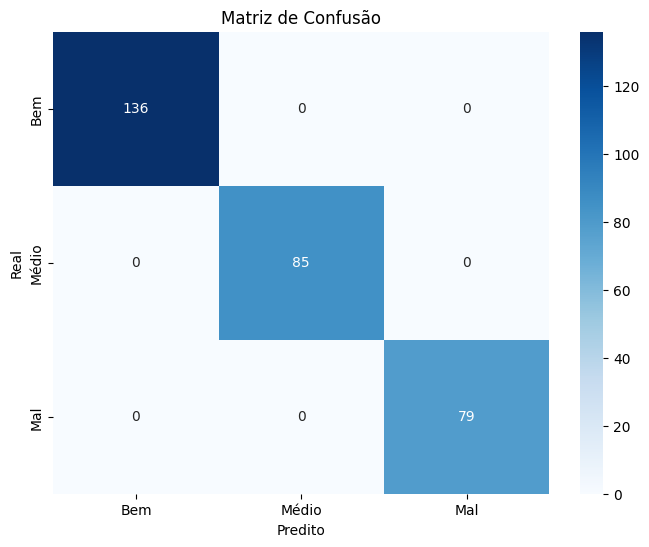

In [7]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos

# Crie uma visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## Métricas de eficácia

In [8]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------

Acurácia: 1.0
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      1.00      1.00       136
         Mal       1.00      1.00      1.00        85
       Médio       1.00      1.00      1.00        79

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

